# Gaussian Processes in 1 Dimension



In [16]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

from helpers import *

import GPy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Helper functions

def vec_to_mat(v):
    """Reshapes a vector of dimension (n,) to have dimension (n,1).
    This is because some GPy methods check ndim(v)==2."""
    return v if v.ndim >= 2 else v[:,np.newaxis]


def scale_input(X):
    "Maps values to unit hypercube."
    xMin = np.min(X, axis=0)    
    xMax = np.max(X, axis=0)
    return (X - xMin) / (xMax - xMin)


def normalize_obs(Y, mu=None, sigma=None):
    """ Rescales observations to have zero mean and unit variance.
    """
    if not mu:
        mu = np.mean(Y, axis=0)
    if not sigma:
        sigma = np.std(Y, axis=0)
    Z = (Y - mu) / sigma
    return Z, mu, sigma

Rotating observed pin locations about z axis


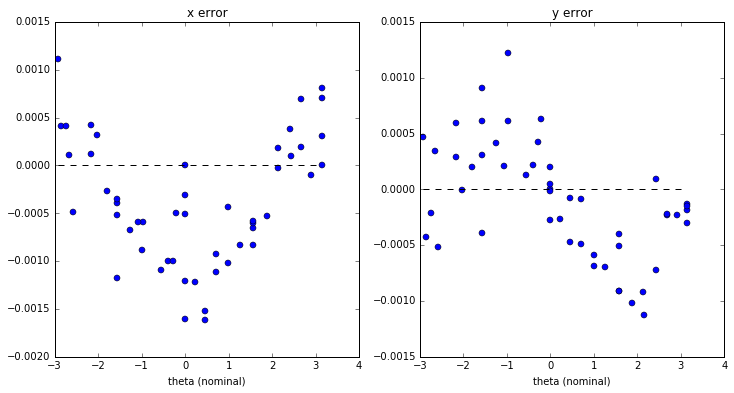

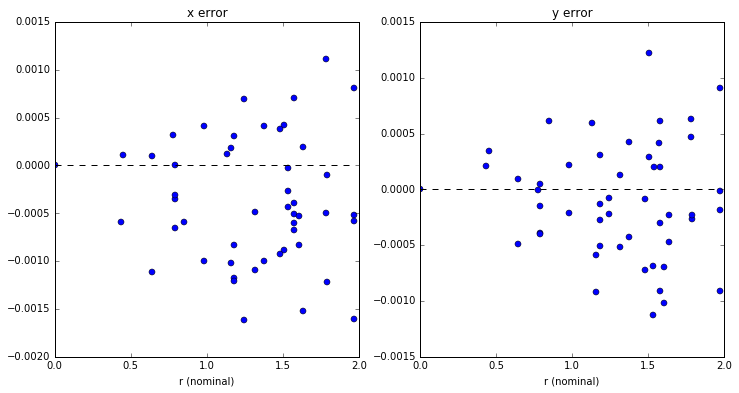

In [47]:
inDir = os.path.join('..', 'data')
inFile = os.path.join(inDir, 'NIST_randomized_metal_no1.csv')
Z = load_data(inFile)

# extract data of interest
# The measured variables wear hats.
x = Z[:,0];  xHat = Z[:,1]
y = Z[:,2];  yHat = Z[:,3]
d = Z[:,4];  dHat = Z[:,5]
z = Z[:,6];  zHat = Z[:,7]

r, theta = cart2polar(x,y)
rHat, thetaHat = cart2polar(xHat, yHat)

# Apply a rotation to the pin locations.
alpha = np.pi/1100.0 
rotClockwise = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
print('Rotating observed pin locations about z axis')

# Variables with tildes are the rotated versions of the hats (observations)
obsHat = np.vstack((xHat, yHat))
obsTilde = np.dot(rotClockwise, obsHat)
xTilde = obsTilde[0,:]
yTilde = obsTilde[1,:]

plot_xy_err_2d(theta, xTilde-x, yTilde-y, xLabel='theta (nominal)')
plot_xy_err_2d(r, xTilde-x, yTilde-y, xLabel='r (nominal)')

(50, 1) 0.0 1.0
(50,) -1.90011435861 2.29056103612

Name                              : GP regression
Log-likelihood                    : -52.1819136498
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |      Value       |  Constraint  |  Prior  |  Tied to
  Mat52.variance           |   1.22830538562  |     +ve      |         |         
  Mat52.lengthscale        |  0.305758650604  |     +ve      |         |         
  Gaussian_noise.variance  |  0.338324757212  |     +ve      |         |         


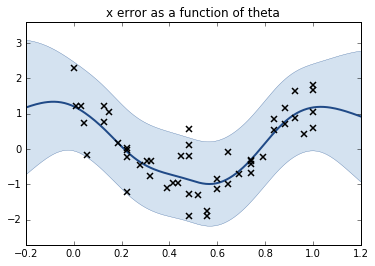

In [45]:
# X := GP input domain
X = scale_input(theta);   # map r to [0,1]
print X.shape, np.min(X), np.max(X)

# obs := response variable
obs, mu, sigma = normalize_obs(xTilde - x)    
print obs.shape, np.min(obs), np.max(obs)

# For now, we use a generic kernel.
# TODO: cross-validation to select kernel.
ker = GPy.kern.Matern52(X.shape[1], ARD=True, lengthscale=.1)
model = GPy.models.GPRegression(X, vec_to_mat(obs), ker)
model.optimize(messages=True, max_f_eval=1000)

print model
model.plot()
plt.title('x error as a function of theta')

(50, 1) 0.0 1.0
(50,) -1.90011435861 2.29056103612

Name                              : GP regression
Log-likelihood                    : -70.9469267501
Number of Parameters              : 3
Number of Optimization Parameters : 3
Updates                           : True
Parameters:
  GP_regression.           |        Value        |  Constraint  |  Prior  |  Tied to
  Mat52.variance           |  3.58749685984e-09  |     +ve      |         |         
  Mat52.lengthscale        |      7.93086203126  |     +ve      |         |         
  Gaussian_noise.variance  |      1.00000405118  |     +ve      |         |         


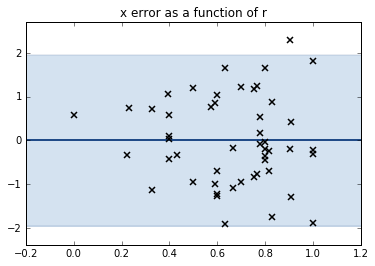

In [46]:
# X := GP input domain
X = scale_input(r);   # map r to [0,1]
print X.shape, np.min(X), np.max(X)

# obs := response variable
obs, mu, sigma = normalize_obs(xTilde - x)    
print obs.shape, np.min(obs), np.max(obs)

# For now, we use a generic kernel.
# TODO: cross-validation to select kernel.
ker = GPy.kern.Matern52(X.shape[1], ARD=True, lengthscale=.1)
model = GPy.models.GPRegression(X, vec_to_mat(obs), ker)
model.optimize(messages=True, max_f_eval=1000)

print model
model.plot()
plt.title('x error as a function of r')